# Predicting Survival of Passengers on Titanic using Python #

Sinking of Titanic was one of the most infamous disaster of all times. It sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. There were certain classes of people whose probability of survival was higher than others. So in this project we aim to predict whether a person survived this disaster given his/her certain characteristics. To solve this problem, I will be following below mentioned structure:
1. Problem Statement 
1. Hypothesis Generation
1. Exploratory Data Analysis(EDA)
1. Feature Engineering
1. Model Fitting
1. Cross Validation and Hyperparameter Optimisation
1. Applying model on test set

## 1. Problem Statement  ##

In a real world situation,this is one of the most important step because without a well defined problem statement it becomes extremely difficult to build a model. However in this case, we already have a well defined problem statement. i.e. : 
>**Given a set of characteristics about passengers, predict which passengers survived the Titanic tragedy.**


## 2. Hypothesis Generation ## 

This step involves brainstorming about factors on which survival of a passenger may depend. This step requires a good **domain knowledge**. Though in this case we are already given data beforehand, however in a real world situation we first build our hypothesis and then collect necessary data accordingly. This step may also help later in feature engineering stage, therefore I will try to generate hypothesis before looking at available data. <br><br>
**Factors on which survival of a passenger on Titanic may depend are: **
* **Gender**: It's a universally established social convention that during any tragedy, women and children are protected first.
*  **Age**: Children first.
* **Location on ship**: There might be certain cabins or compartments in ship whose passengers were impossible or very difficult to save due to possible reasons like:
    * Lack of time: If passenger's Deck/ Cabin was in area which suffered first blow or sank first might have got less time to get on a lifeboat.
    * Non-availability of life boat in their area, or nearest lifeboat faraway.
* **Socio-Economic Status**: **Money** and **power** can get you many things: It's a universal truth which might have applied on Titanic too.
* **Know Swimming?**: Passenger who knew how to swim would have swam to the nearest lifeboat and thus survived.
* **Travelling alone or with family?**: A person travelling with a spouse or family would have tried to save their family members first before saving himself/herself. Moreover while accommodating people on lifeboats, there might have been "Only 1 member per family rule". 

I listed some of the factors on which survival of a passenger may depend. We may discover other factors while searching for data. In this case since we already have the data, so we can check what we missed in our hypothesis by looking at it. Vice-a-versa, we can also try to find data for factors which are in our hypothesis set but not in dataset. 

## 3.Exploratory Data Analysis

This is the step where we look at data, explore it, try to understand the distribution and draw necessary conclusions and inferences which can be used later to engineer features. So let's start!


In [1]:
#Importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style("white")

In [2]:
# Reading train and test dataset into pandas data frame
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
#Having a peek at training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We observe that we are given 11 features on the basis of which we want to predict whether a passenger survived or not.



### 3.1. Univariate Analysis 

In this step, we look at each feature in isolation, try to understand its distribution. We also analyse potential role of a feature in predicting survival. This in turn will help us to engineer those features in such a way that they help in better prediction. Univariate analysis  is done separately for **continuous** and **categorical** variables.  So first step is to distinguish categorical variables from continuous ones.

### Variable Identification & Description: ###

In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

1. **Passenger Id**: Continuous. Giving unique Id to each passenger.
1. **Survived**: Nominal Categorical. Tells whether passenger survived or not. 0 = Not Survived  1 = Survived.
1. **Pclass**: Ordinal Categorical. Indicator of Socio-Economic status of a passenger: Can take only 3 values i.e. 1,2 and 3. 1 = Upper 2 = Middle 3= Lower.
1. **Name**: Nominal Categorical.
1. **Sex**: Nominal Categorical.
1. **Age**: Continuous. Can take any value within a certain range.
1. **SibSp**: Discrete Numeric. Number of Siblings and Spouse of that passenger. It can be any whole number and can be treated as both continous as well as categorical depending on its range.
1. **Parch**: Discrete Numeric. Number of parents and children of that passenger.
1. **Ticket**: Ticket number of passenger.By taking a peek at data, we observe that ticket is alpahnumeric so it is of mixed type. We can draw more conclusions only by looking further at data.
1. **Fare**: Continuous. Fare can be any value in a certain range.
1. **Cabin**: Categorical.
1. **Embarked**: Nominal Categorical. Tell us from where a passenger embarked the ship.

### Continuous Variables###

#### PassengerId:<br>
It is difficult to think of any scenario in which survival of a passenger depends on passenger Id. We can confirm this fact by bivariate analysis in later step. After that we can safely **drop this column** entirely. Let's check it's descriptive statistics.

In [5]:
train['PassengerId'].describe()

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64

We observe there are total 891 observations. This will help us in checking whether any other feature has any missing value.

**Age**: <br>

In [6]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

**Observations:**
1.  Count is 714 which is less than 891, thus there are some **missing values** which will be treated later.
1. Min. and max. tells there were people from all age groups : starting from infants(less than 1 year old) to old age people(80 yrs).
1.  Quarterlies show that most of the passengers were relatively young. (75% were less than 38 years).
Lets visually observe distribution of passengers age via **histogram ** and **kernel density plot**.

Text(0,0.5,'Count')

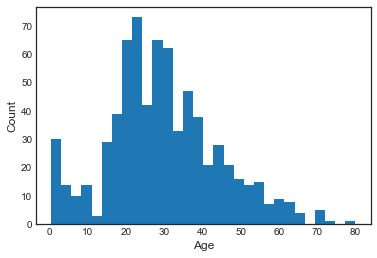

In [7]:
#Histogram for Age distribution
train['Age'].hist(bins =30,grid = False)
plt.xlabel('Age',fontsize =12)
plt.ylabel('Count',fontsize =12)

Text(0,0.5,'Density')

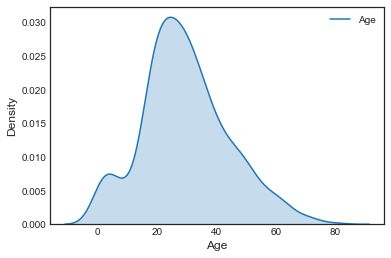

In [8]:
#KernelDensityPlot
sns.kdeplot(train['Age'],shade = True)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Density',fontsize=12)

From above visualisations, we observe that distribution is close to normal but with few exceptions:
1. There is a slight bulge in 0-15 years group which shows number of passengers in age group 0-10 are unusally higher than in age group 10-13.
1. It is slightly skewed towards right. Distribution can be normalised by **log transform** or **boxcox transform**.

** Fare: **

In [9]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

** Observations: **<br>
1. Minimum Fare is 0. This might be the case for crew members or might be an error.
1. There are no missing values.
1. Fare of 75% passengers is below 31 but still we have maximum value of $512 which shows presence of outliers. Outliers become more visible in boxplot.

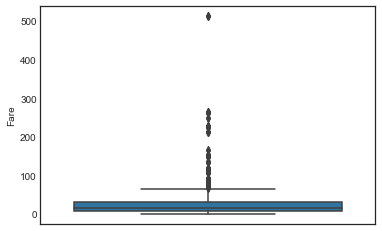

In [10]:
sns.boxplot(train['Fare'],orient ='v')

Presence of datapoints above whiskers show presence of outliers which will be treated later.

Text(0,0.5,'Density')

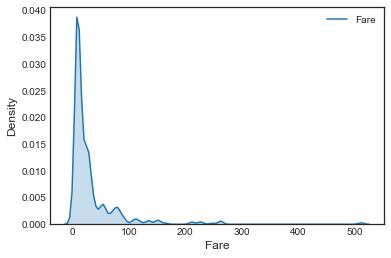

In [11]:
sns.kdeplot(train['Fare'],shade = True)
plt.xlabel('Fare',fontsize=12)
plt.ylabel('Density',fontsize=12)

Presence of outliers made distribution skewed towards right. However outliers in this case maybe natural because some passengers might have paid very high fare to get ultra luxury treatment.

### Categorical Variables

** Survived: **

In [12]:
#Count for each unique value
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
#Count % for each unique value
train['Survived'].value_counts(normalize = True)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

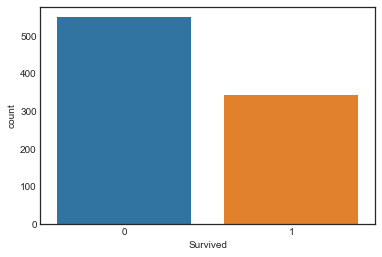

In [14]:
sns.countplot(x ='Survived',data = train)

This data is close to original fact that around 65% people died in Titanic disaster.

** Pclass: **

In [15]:
#Count for each unique value
train['Pclass'].value_counts(sort = False)

1    216
2    184
3    491
Name: Pclass, dtype: int64

In [16]:
#Count % for each unique value
train['Pclass'].value_counts(normalize = True,sort = False)*100

1    24.242424
2    20.650954
3    55.106622
Name: Pclass, dtype: float64

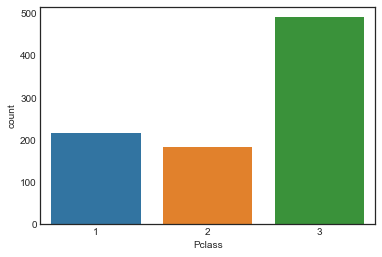

In [17]:
sns.countplot(x ='Pclass',data = train)

Most of the passengers( around 55%) were from lower class and maybe most of them died, which we will confirm in multivariate analysis.

** Name: **<br>
Name can't be analysed like other categorical variables above. To get some information out of it, lets observe the data.


In [18]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

We observe that each name contains a **Title**(Mr,Miss,Mrs,etc) which can give us some information about gender and age of person. Though we already have Age and sex features separately but extracting Titles from Name can help us in filling missing age values more appropriately. We will do so in feature engineering step and then analyse those titles.

** Sex:**<br>

In [19]:
#Count for each unique value
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [20]:
#Count % for each unique value
train['Sex'].value_counts(normalize = True,sort = False)*100

female    35.241302
male      64.758698
Name: Sex, dtype: float64

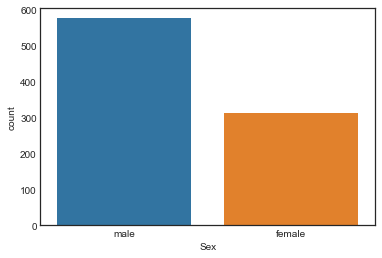

In [21]:
sns.countplot(x ='Sex',data = train)

**Observation:** There were more male than female passengers.

**SibSp** & **Parch**:

In [22]:
#Count for each unique value
train['SibSp'].value_counts(sort = False)

0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

In [23]:
#Count% for each unique value
train['SibSp'].value_counts(normalize = True, sort = False)*100

0    68.237935
1    23.456790
2     3.142536
3     1.795735
4     2.020202
5     0.561167
8     0.785634
Name: SibSp, dtype: float64

In [24]:
#Count for each unique value
train['Parch'].value_counts(sort = False)

0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

In [25]:
#Count% for each unique value
train['Parch'].value_counts(normalize = True,sort = False)*100

0    76.094276
1    13.243547
2     8.978676
3     0.561167
4     0.448934
5     0.561167
6     0.112233
Name: Parch, dtype: float64

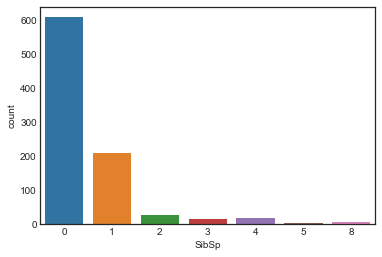

In [26]:
sns.countplot(x ='SibSp',data = train)

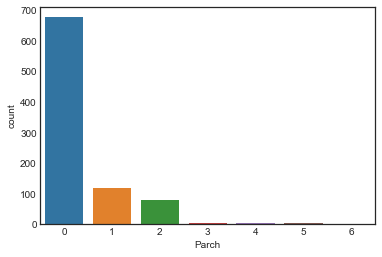

In [27]:
sns.countplot(x ='Parch',data = train)

**Observation:** We observe that majority of passengers are travelling alone. Moreover, there are very few passengers with more than 2 siblings or more than 3 parents/children. Thus they can be treated as outliers or can be **binned together** in a separate category. Moreover survival of a passenger won't depend much on whether he/she was with spouse, sibling, parent or children. They are all part of family. So we can combine both features of 'SibSp' and 'Parch' into a **new feature** of **'Number of family members'** which might help make better prediction. 
Also, since most of the passengers are travelling alone so in addition to a feature of 'number of family members'we  might add another feature which only answers whether he is travelling alone or not. 

**Embarked:**<br>

In [28]:
train['Embarked'].count()

889

In [29]:
train['Embarked'].value_counts(normalize = True)*100

S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64

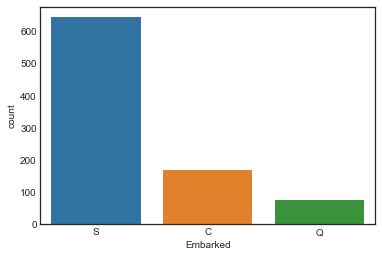

In [30]:
sns.countplot(x ='Embarked',data = train)

**Observations:** <br>
1. There are 2 missing values.
1. Majority of passengers embarked from Southampton station.
1. Though survival of a passenger might not directly depend on station from which he/she embarked ship but his/her socio-economic status might be related to that which in turn might affect his/her survival. We will study relation between Embarked and PClass in multivariate analysis.

**Cabin:**<br>
Before analysing Cabin, we have to look at its values to understand it.

In [31]:
train['Cabin']

0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
          ...     
861            NaN
862            D17
863            NaN
864            NaN
865            NaN
866            NaN
867            A24
868            NaN
869            NaN
870            NaN
871            D35
872    B51 B53 B55
873            NaN
874            NaN
875            NaN
876            NaN
877            NaN
878            NaN
879            C50
880            NaN
881            NaN
882         

In [32]:
train['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

**Observations:**<br>
1. A lot of values are missing.
2. Some people have more than one cabin.
3. Each cabin is alphanumeric with a single alphabet followed by numbers. So one of the way to use it is by extracting alphabet from each cabin number. This alphabet denotes the deck and its the location of deck that determines survival.

**Ticket: **<br>
Before analysing Ticket, we have to look at its values to understand it.

In [33]:
train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
5                330877
6                 17463
7                349909
8                347742
9                237736
10              PP 9549
11               113783
12            A/5. 2151
13               347082
14               350406
15               248706
16               382652
17               244373
18               345763
19                 2649
20               239865
21               248698
22               330923
23               113788
24               349909
25               347077
26                 2631
27                19950
28               330959
29               349216
             ...       
861               28134
862               17466
863            CA. 2343
864              233866
865              236852
866       SC/PARIS 2149
867            PC 17590
868              345777
869              347742
870              349248
871             

In [34]:
train['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [35]:
train[train['Ticket']== '347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


**Observations:**<br>
1. Tickets are alphanumeric with no specific visible pattern.
1. Numeric part in ticket is also not of homogeneous length from which any meaningful pattern maybe extracted.
1. Total count is 891, while unique ticket values are only 681 which implies that there are duplicates in Ticket no. This maybe due to the fact that whole family is given same ticket number. We can observe above that all passengers with Ticket no. 347082 have last name as Andersson and 6 family members.

There is very less chance that Ticket number of a person might affect his/her survival directly. But Ticket number might give us information about location on deck which in turn affects survival. However seeing the data, it doesn't seem cost-effective to forecefully find that information from it. Instead it might be better for complexity of our hypothesis set if we just **drop** this column entirely.

### 3.2. Multivariate Analysis

In this step, generally we study relation between all independent variables and target variable. However relation within independent variables/ features can also be studied.

#### Plotting Correlation Map:

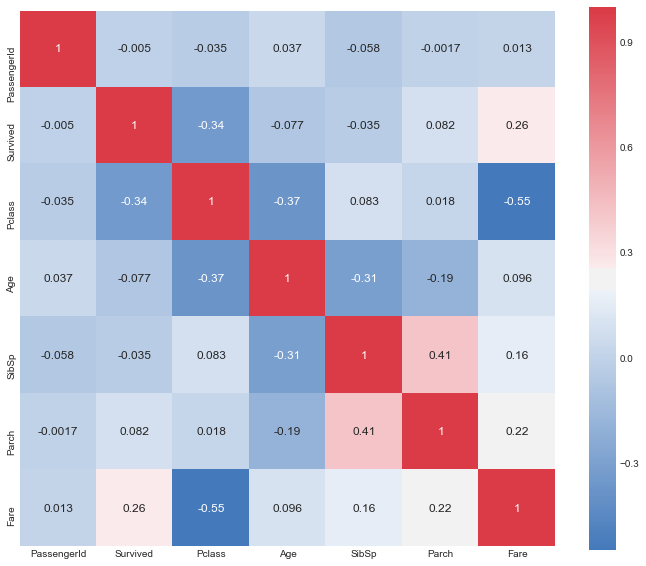

In [36]:
f,ax = plt.subplots(figsize = (12,10))
cmap = sns.diverging_palette( 250 , 10 , as_cmap = True )

sns.heatmap(train.corr(),annot = True,square = True,cmap =cmap,ax =ax,annot_kws = {'fontsize': 12})

**Observations:**<br>
1. Survival is correlated with Fare and Socio-Economic status(as expected). So money and power did save people lives.
1. PassengerId has no link at all with survival or any other feature,so now we can safely drop the entire column.
1. Apparently Age(in its original form) is not much correlated with Survived. So we will try binning age and then check for correlation.
1. Numerically, number of Parents/Children/Siblings/Spouse are not much correlated with Survival.This also makes the case for new feature of "IsAlone".
1. Pclass and Fare are inversely correlated which makes sense.
1. Age is inversely correlated with Pclass which tells richer or socially superior people are generally older in age which is the case in reality too.
1. Passengers with more Siblings/Spouse have more parents/children too.

Correlation with Sex and Embarked is absent because their data type is string. I will study their correlation later after I encode them in feature engineering step.

#### Relation between Embarked and Survived:

In [37]:
pd.crosstab(train['Embarked'],train['Survived'],margins =True,normalize = True)*100

Survived,0,1,All
Embarked,,,
C,8.436445,10.461192,18.897638
Q,5.286839,3.374578,8.661417
S,48.031496,24.409449,72.440945
All,61.754781,38.245219,100.000000


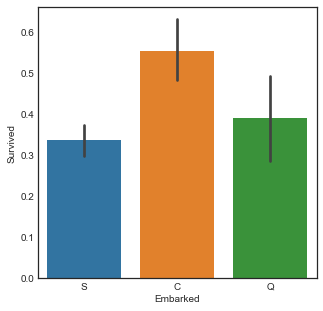

In [38]:
plt.subplots(figsize=(5,5))
sns.barplot(x= 'Embarked',y='Survived',data = train)

Passengers who embarked from station C had better chance of survival. We hypothesized earlier that Embarked might be linked to Pclass which in turn affects Survival, so let's explore relation between all three.

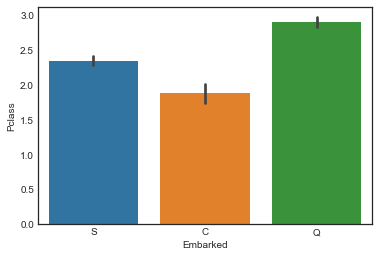

In [39]:
sns.barplot(x= 'Embarked',y='Pclass',data = train)

In [40]:
train[['Embarked','Pclass','Survived']].groupby(['Embarked','Survived']).mean()

Pclass
Embarked Survived          
C        0         2.200000
         1         1.634409
Q        0         2.936170
         1         2.866667
S        0         2.545667
         1         1.967742

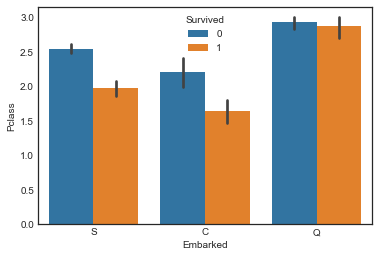

In [41]:
sns.barplot(x='Embarked',y='Pclass',hue ='Survived',data=train)

1. We can observe that passengers who embarked from C are majorly from higher or middle class thus they have better chance of survival. 
1. Passengers who embarked from Q were predominantly from lower class thus there is no difference in class between their survived and dead passengers. 
1. On the other hand passengers who survived from station C and S were majorly from higher or middle class and vice a versa. 
1. Though relation between Pclass and Survived became clear but still lets visualise their bilateral relation.

**Relation between Pclass and Survived**

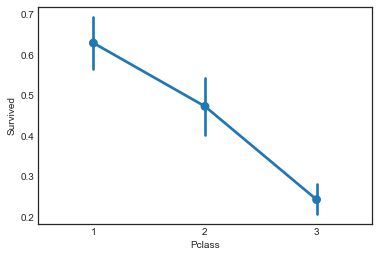

In [42]:
sns.pointplot(x='Pclass',y= 'Survived',data = train)

**Sex and Survived:**

In [43]:
pd.crosstab(train['Sex'],train['Survived'],margins =True,normalize = True)*100

Survived,0,1,All
Sex,,,
female,9.090909,26.150393,35.241302
male,52.525253,12.233446,64.758698
All,61.616162,38.383838,100.000000


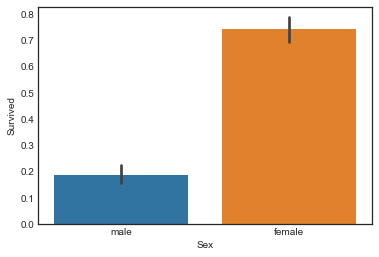

In [44]:
sns.barplot(x='Sex',y='Survived',data = train)

This confirms the social convention of saving women first. To confirm children are also protected first lets see another visualisation.

** Age and Survived: **

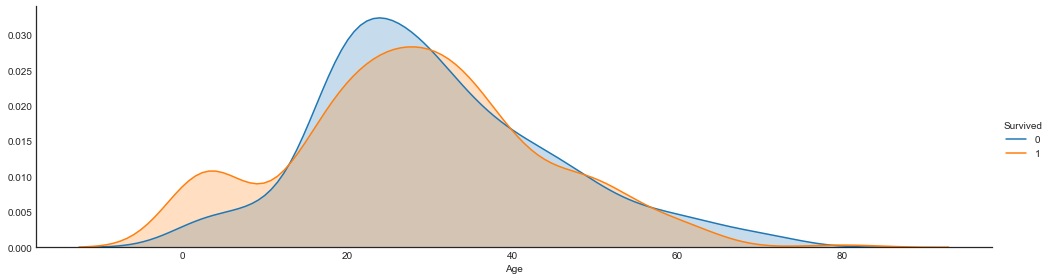

In [45]:
g = sns.FacetGrid(data= train,hue ='Survived',aspect =3.5,size =4)
g.map(sns.kdeplot,'Age',shade = True)
g.add_legend()

Thus it is confirmed that social convention of saving women and children first was followed during titanic disaster too. Elders( above 60 yrs) were not saved.

** Fare and Survived: **

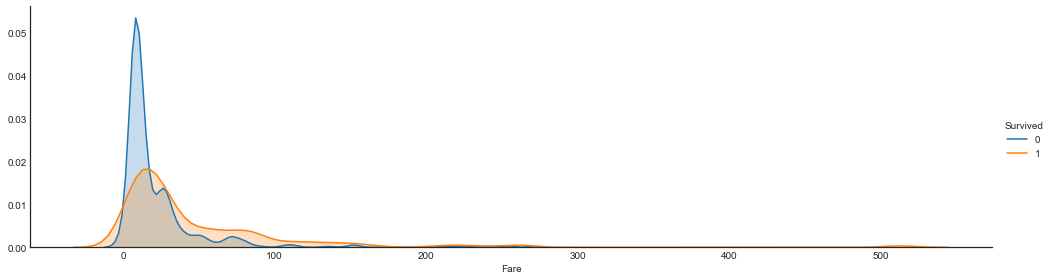

In [46]:
g = sns.FacetGrid(data= train,hue ='Survived',aspect =3.5,size =4)
g.map(sns.kdeplot,'Fare',shade = True)
g.add_legend()

Passengers who paid higher fare had better chance of survival. However fare of most of the passengers was in range of $0-100.

We have so far analysed current features in isolation as well as in relation to Survival. While analysing we realised the necesseity of transformation in some cases. Thus in next stage we will engineer new features or transform existing ones to increase their prediction power.

# 4. Feature Engineering

Let's summarise the observations we made in above sections. On the basis of those observations, we will feature new engineers: 
1. Drop PassengerId and Ticket columns entirely.
1. Combine SibSp and Parch into No. of family members.
1. Create a new column of whether passenger is alone or not. We may also try to categorise family into 3 bins: 'Alone', 'Couple' and 'Family'.
1. Extract 'Title' from name.
1. Extract alphabets(Deck name) from Cabin.
1. Encode categorical variables: Sex, Embarked and Cabin.

**Dropping useless columns: **

In [47]:
train = train.drop(['PassengerId','Ticket'],axis=1)
test = test.drop('Ticket',axis=1)

We will drop PassengerId from test set later because we will need PassengerId to submit predictions on Kaggle and check score.

** Family members feature:**

In [48]:
train['Family'] = train['SibSp']+train['Parch']
test['Family'] = test['SibSp']+test['Parch']

Let's analyse this new feature.

In [49]:
train['Family'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

Passengers with more than 2 family members are very few so let's combine them together in one category. I am giving them number 3 for now.

In [50]:
train['Family'] = train['Family'].apply(lambda x: 3 if x>2 else x)
test['Family'] = test['Family'].apply(lambda x: 3 if x>2 else x)

In [51]:
test['Family'].value_counts()

0    253
1     74
2     57
3     34
Name: Family, dtype: int64

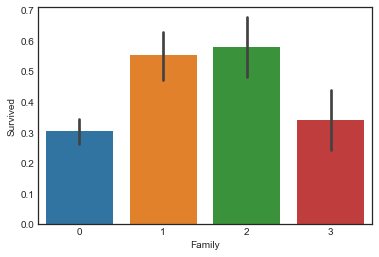

In [52]:
sns.barplot(x ='Family',y='Survived',data= train)

We will not be using Parch and SibSp columns now once we have family members column. It will unnecessarily increase complexity of our hypothesis set.

In [53]:
train.drop(['SibSp','Parch'],axis =1 ,inplace = True)
test.drop(['SibSp','Parch'],axis =1 ,inplace = True)

In [54]:
train['IsAlone'] = train['Family'].apply(lambda x: 1 if x==0 else 0)

In [55]:
test['IsAlone'] = test['Family'].apply(lambda x: 1 if x==0 else 0)

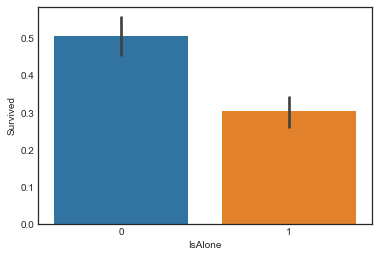

In [56]:
sns.barplot(x ='IsAlone',y='Survived',data= train)

Ironically passengers who were travelling alone had lower chance of survival.

** Extracting Title from Name: **

In [57]:
train['Title'] = train['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())
train.drop('Name',axis=1,inplace = True)
test['Title'] = test['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())
test.drop('Name',axis=1,inplace = True)

In [58]:
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Lady              1
Capt              1
Sir               1
the Countess      1
Ms                1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

We observe that most of the titles are general like Mr., Miss., Mrs., Master. But there are certain titles which denote that passenger belonged to royal family like Countess, Lady, Sir, etc. Certain titles denote that person held an authoritative/respectable post like Major, Capt, Dr., etc. Mlle and Mme are just French for Miss and Mrs respectively. Thus in addition to general titles we will create two more classes "Officer" and "Royalty" in which we will place officers and members from royal family respectively.

In [59]:
Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
train['Title'] = train.Title.map(Title_Dictionary) 
test['Title'] = test.Title.map(Title_Dictionary)

In [60]:
train['Title'].value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

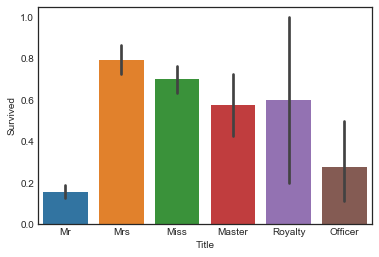

In [61]:
sns.barplot(x='Title',y ='Survived',data = train)

1. Chances of survival of Mrs, Miss and Master are higher than Mr: We already confirmed this fact before by analysing relation between sex,age and survived. 
1. Members of royal family had higher chance of survival because of their high social status. 
1. Officers didn't survive because they would have helped others before saving themselves.

** Transforming Cabin:**

Before extracting first alphabet from cabin names, let's fill all missing values with alphabet 'U' (short for unknown.) We are filling missing values with unknown because there are a lot of missing values and filling with mode may not be a good choice.

In [62]:
train['Cabin'].fillna('U',inplace = True)
train['Cabin'] = train['Cabin'].map(lambda x: x[0])
test['Cabin'].fillna('U',inplace = True)
test['Cabin'] = test['Cabin'].map(lambda x: x[0])

In [63]:
train['Cabin'].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

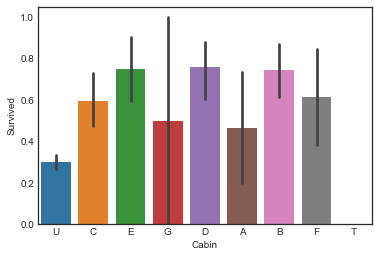

In [64]:
sns.barplot(x ='Cabin',y = 'Survived',data = train)

Passengers from cabin B,D and E had higher chance of survival. However,since most of the cabin data is missing we can't make any meaningful conclusions.

### Missing Value Treatment:

Features in training set with missing values:
1. Age
1. Embarked

We need to fill missing values in test set too. So let's see which variables in test set have missing values.

In [65]:
test.describe()

,PassengerId,Pclass,Age,Fare,Family,IsAlone
count,418.000000,418.000000,332.000000,417.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,35.627188,0.693780,0.605263
std,120.810458,0.841838,14.181209,55.907576,0.987699,0.489380
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,7.895800,0.000000,0.000000
50%,1100.500000,3.000000,27.000000,14.454200,0.000000,1.000000
75%,1204.750000,3.000000,39.000000,31.500000,1.000000,1.000000
max,1309.000000,3.000000,76.000000,512.329200,3.000000,1.000000


In [66]:
test.describe(include =['O'])

,Sex,Cabin,Embarked,Title
count,418,418,418,418
unique,2,8,3,6
top,male,U,S,Mr
freq,266,327,270,240


Features in test set with missing value are :
1. Age
1. Fare

#### Filling Age:

There can be many ways of filling missing values. We can either fill with median/mean/mode age. We can fill it with any random number between mean and standard deviation or we can predict it using other features. We exploit the connection between Title, Pclass, Sex and Age to fill missing age values.

In [67]:
# Filling missing age of training data:
grouped_data= train.groupby(['Sex','Pclass','Title'])
grouped_data_median = grouped_data.median()
nullAges = train.index[train['Age'].isnull()].tolist()
for i in nullAges:
    if(pd.isnull(train['Age'][i])):
        train['Age'][i]= grouped_data_median['Age'][train.ix[i,'Sex']][train.ix[i,'Pclass']][train.ix[i,'Title']]

In [68]:
# Filling missing age of test data:
grouped_test= test.groupby(['Sex','Pclass','Title'])
grouped_test_median = grouped_test.median()
nullTestAges = test.index[test['Age'].isnull()].tolist()
for i in nullTestAges:
    if(pd.isnull(test['Age'][i])):
        test['Age'][i]= grouped_test_median['Age'][test.ix[i,'Sex']][test.ix[i,'Pclass']][test.ix[i,'Title']]

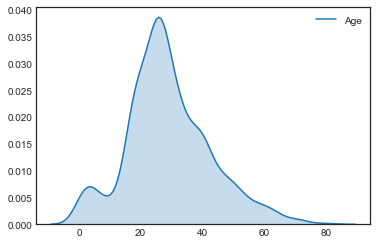

In [69]:
sns.kdeplot(train['Age'],shade = True)

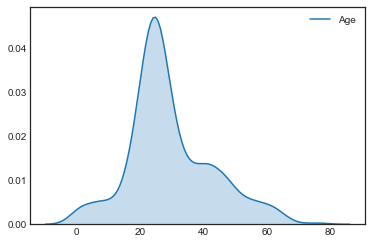

In [70]:
sns.kdeplot(test['Age'],shade = True)

We observe distribution is close to normal so there is no need to tranform it.

#### Filling Missing Embarked:

We observe that there are only two missing values for Embarked. So we will just fill with mode of Embarked rather than applying any complex process.

In [71]:
train['Embarked'].fillna('S',inplace = True)

#### Filling Missing Fare: 

Fare is linked with Pclass of a person and station from where he embarked. So we will use that information to fill missing fare value.

In [72]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Family,IsAlone,Title
152,1044,3,male,60.5,NaN,U,S,0,1,Mr


In [73]:
Fare_grouped = test.groupby(['Sex','Pclass','Embarked','Title'])
Fare_grouped_median = Fare_grouped.median()
Fare_grouped_median

PassengerId   Age       Fare  Family  IsAlone
Sex    Pclass Embarked Title                                                 
female 1      C        Miss          1052.0  34.0   98.23960     0.0      1.0
                       Mrs           1116.0  48.0   79.20000     1.0      0.0
                       Royalty       1306.0  39.0  108.90000     0.0      1.0
              Q        Mrs           1303.0  37.0   90.00000     1.0      0.0
              S        Miss          1085.5  29.5  188.10210     0.0      1.0
                       Mrs            988.0  51.0   53.10000     1.0      0.0
       2      C        Miss          1150.0  15.5   27.71875     2.0      0.0
                       Mrs           1080.0  24.0   32.36250     1.5      0.0
              S        Miss          1112.5  19.5   24.50000     1.5      0.0
                       Mrs           1123.5  29.5   24.50000     1.0      0.0
       3      C        Miss          1175.0   9.0   15.24580     2.0      0.0
                       Mrs           1117.0  28.0    8.51670     1.0      0.0
              Q        Miss          1095.0  22.0    7.75000     0.0      1.0
                       Mrs            980.0  28.0    7.75000     0.0      1.0
              S        Miss          1080.0  22.0    8.66250     0.0      1.0
                       Mrs           1048.0  28.0   15.02500     2.0      0.0
male   1      C        Master        1022.0   9.5  198.43750     2.5      0.0
                       Mr            1071.0  42.5   66.33125     1.0      0.0
                       Officer       1058.5  50.0  128.01250     0.5      0.5
              S        Mr            1123.0  42.0   41.00000     0.0      1.0
                       Officer       1185.0  53.0   81.85830     2.0      0.0
       2      C        Mr            1156.0  28.0   15.03330     0.0      1.0
              Q        Mr             942.0  48.0   11.52915     0.0      1.0
              S        Master        1033.5   5.0   27.75000     2.0      0.0
                       Mr            1169.5  27.5   13.00000     0.0      1.0
                       Officer       1048.5  35.5   19.50000     1.0      0.5
       3      C        Master        1142.0   7.0   15.24580     2.0      0.0
                       Mr            1063.0  25.0    7.22920     0.0      1.0
              Q        Master         947.0  10.0   29.12500     3.0      0.0
                       Mr            1125.0  25.0    7.75000     0.0      1.0
              S        Master        1186.0   7.0   17.37500     2.0      0.0
                       Mr            1102.0  25.0    7.89580     0.0      1.0

In [74]:
test['Fare'].fillna(7.89580,inplace = True)

### Encoding Data/ Data PreProcessing:

Most of the algorithms don't accept categorical data directly. They need to be encoded numerically. Two types of encoding are possible:
1. One hot encoding
1. Integer encoding

In this case, I will be doing integer encoding.

#### Encoding Sex:

In [75]:
train['Sex'] = train['Sex'].map( {'female': 1, 'male': 0} )
test['Sex'] = test['Sex'].map( {'female': 1, 'male': 0} )

#### Encoding Cabin:

In [76]:
Cabin_Dictionary = {
    "U" : 0,
    "C" : 1,
    "B" : 2,
    "D" : 3,
    "E" : 4,
    "A" : 5,
    "F" : 6,
    "G" : 7,
    "T" : 8
}
train['Cabin']= train.Cabin.map(Cabin_Dictionary)
test['Cabin']= test.Cabin.map(Cabin_Dictionary)

#### Encoding Embarked: 

In [77]:
Embarked_mapping = {
    'S': 0,
    'C': 1,
    'Q': 2
}
train['Embarked'] = train['Embarked'].map(Embarked_mapping)
test['Embarked'] = test['Embarked'].map(Embarked_mapping)

#### Encoding Title:

In [78]:
Title_coding = {
    "Mr": 0,
    "Miss": 1,
    "Mrs" : 2,
    "Master": 3,
    "Officer": 4,
    "Royalty": 5
}
train['Title'] = train['Title'].map(Title_coding)
test['Title'] = test['Title'].map(Title_coding)

In [79]:
train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
Fare        float64
Cabin         int64
Embarked      int64
Family        int64
IsAlone       int64
Title         int64
dtype: object

In [80]:
test.dtypes

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
Fare           float64
Cabin            int64
Embarked         int64
Family           int64
IsAlone          int64
Title            int64
dtype: object

Now all the features are ready for modelling process. Before going to next stage, let's view the correlation map again because now we can see correlation with categorical features too.

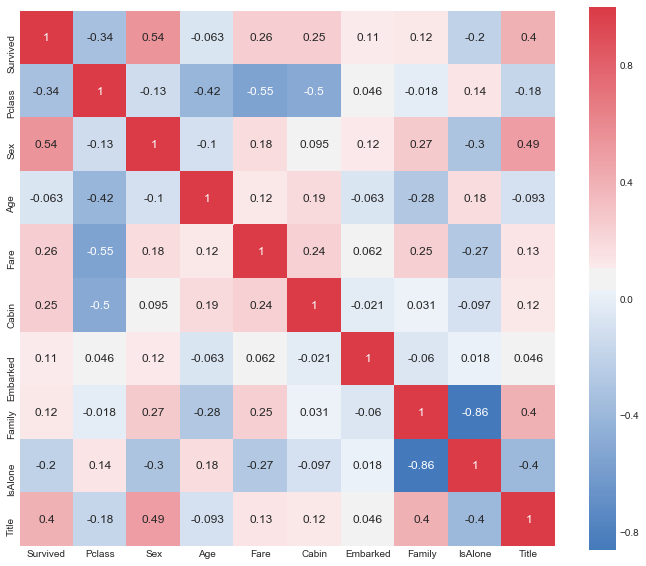

In [81]:
f,ax = plt.subplots(figsize = (12,10))
cmap = sns.diverging_palette( 250 , 10 , as_cmap = True )

sns.heatmap(train.corr(),annot = True,square = True,cmap =cmap,ax =ax,annot_kws = {'fontsize': 12})

# 5. Model Fitting:

There are various classification models we can use:
1. Decision Tree
1. Naive Bayes Classifier
1. KNN Classifier
1. SVM Classifier
1. Random Forest
1. Logistic Regression

We will fit each of the above models one by one and then tune the parameters of one which gives least out of sample error/highest accuracy. However a single model isn't as powerful as ensemble of all these models. Random Forest is also an example of ensembled model.

First, we will split training set into training and validation set. Validation set will be used for model selection.

In [82]:
X = train.drop('Survived',axis =1)
Y = train['Survived']
X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size = 0.2)

In [83]:
def plot_feature_importance(model):
    feature_imp =pd.DataFrame()
    feature_imp['Feature'] = X.columns
    feature_imp['Importance'] = model.feature_importances_
    feature_imp.sort_values(by =['Importance'],ascending = False,inplace = True)
    feature_imp.set_index('Feature',inplace= True)
    feature_imp.plot(kind ='bar',figsize =(5,5))

#### Decision Tree:

In sample accuracy: 98.8764044944
Out sample accuracy: 82.1229050279


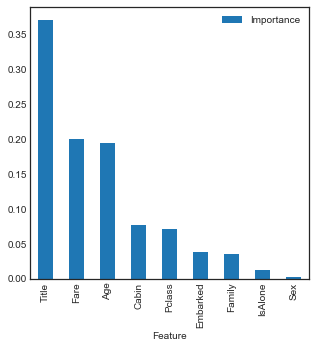

In [84]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_val)
print("In sample accuracy: "+ str(dt.score(X_train,Y_train)*100))
print("Out sample accuracy: "+ str (dt.score(X_val,Y_val)*100))
plot_feature_importance(dt)

Huge difference between In sample and out of sample accuracy implies that there is overfitting in this model which can be avoided by parameter tuning. Moreover Title, Fare and Age are the most important factors for decision tree to decide.

#### Naive Bayes Classifier:

In [85]:
NB = GaussianNB()
NB.fit(X_train,Y_train)
Y_pred = NB.predict(X_val)
print("In sample accuracy: "+ str(NB.score(X_train,Y_train)*100))
print("Out sample accuracy: "+ str (NB.score(X_val,Y_val)*100))

In sample accuracy: 75.8426966292
Out sample accuracy: 75.9776536313


Its accuracy is lower than Decision Tree but it's **generalisation error** is low and it is not overfitting data.

#### KNN Classifier:

In [86]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_val)
print("In sample accuracy: "+ str(knn.score(X_train,Y_train)*100))
print("Out sample accuracy: "+ str (knn.score(X_val,Y_val)*100))

In sample accuracy: 84.8314606742
Out sample accuracy: 74.3016759777


#### Support Vector Machine:

In [87]:
svc = SVC()
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_val)
print("In sample accuracy: "+ str(svc.score(X_train,Y_train)*100))
print("Out sample accuracy: "+ str (svc.score(X_val,Y_val)*100))

In sample accuracy: 91.9943820225
Out sample accuracy: 73.7430167598


#### Logistic Regression:

In [88]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_val)
print("In sample accuracy: "+ str(logreg.score(X_train,Y_train)*100))
print("Out sample accuracy: "+ str (logreg.score(X_val,Y_val)*100))

In sample accuracy: 81.1797752809
Out sample accuracy: 83.2402234637


Logistic Regression is giving good accuracy out of all till now and also low generalisation error.

#### Random Forest:

In sample accuracy: 96.9101123596
Out sample accuracy: 83.7988826816


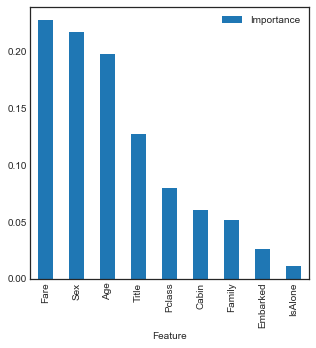

In [89]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_val)
print("In sample accuracy: "+ str(rf.score(X_train,Y_train)*100))
print("Out sample accuracy: "+ str (rf.score(X_val,Y_val)*100))
plot_feature_importance(rf)

Random Forest is also offering good enough accuracy but it is also overfitting.We can reduce this overfitting by tuning its parameters in next section.

## 6. Cross Validation and Hyperparameter Tuning:

We will be performing 10 fold cross-validation on Random Forest model and tune one of its many parameters to prevent overfitting. Parameter which we will be tuning is max depth of decision trees built by the forest.

In [90]:
def parameter_score(depth):
    rf = RandomForestClassifier(max_depth = depth,random_state =84)
    kf = KFold(n_splits =10)
    outcomes =[]
    for train_index,test_index in kf.split(X):
        X_train,X_test = X.values[train_index],X.values[test_index]
        Y_train,Y_test = Y.values[train_index],Y.values[test_index]
        rf.fit(X_train,Y_train)
        predictions = rf.predict(X_test)
        Ein.append(rf.score(X_train,Y_train))
        score = rf.score(X_test,Y_test)
        outcomes.append(score)
    return np.mean(outcomes)*100


<img src ='Tuning.png'>
We observe that below a certain maximum depth there is underfitting and above it, there is overfitting. Therefore we will find that optimal maximum depth where accuracy on validation set reaches local maxima or mean average error reaches local minima.

In [91]:
for i in range(1,10):
    print("Max depth: %d  \t\t Accuracy:  %.2f" %(i,parameter_score(i) ))

NameError: name 'Ein' is not defined

We observe that we get highest accuracy at max depth =5. So we will be using that parameter in our model and fit data using it.

In [ ]:
rf = RandomForestClassifier(max_depth = 5, random_state =84)
rf.fit(X,Y)
plot_feature_importance(rf)

## 7. Model Deployment on Test Data:

In [ ]:
ids = test['PassengerId']
predictions = logreg.predict(test.drop('PassengerId',axis =1))
output = pd.DataFrame({'PassengerId': ids,'Survived': predictions})
output.to_csv('titanic_predictions.csv',index=False)

When I submitted predictions using above model on Kaggle, I acheived Accuracy score of **0.79425.** and place among **top 25%** of submissions.
<img src='Kaggle.png' width = 800 height = 800>

#### References:

This project was one of the learning exercise for me. Therefore I took help from few notebooks from Kaggle and a blog:
1. https://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html
1. https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial
1. https://www.kaggle.com/startupsci/titanic-data-science-solutions